# Exploratory Data Analysis

In [2]:
import requests as r
import numpy as np
import pandas as pd
import json
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb

import warnings
warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight') 

# Visualization of data

In [3]:
moviedata = pd.read_csv('cleaned-movie-dataset.csv',index_col= 0)
moviedata

,id,title,adult,popularity,budget,revenue,vote_count,vote_average,release_date,release_year,original_language,genre,casts,keywords,recommendations,similar_movies
1,19995,Avatar,False,432.199,237000000,2920357254,28759,7.569,2009-12-15,2009,en,"['Action', 'Adventure', 'Fantasy', 'Science Fi...","['Sam Worthington', 'Zoe Saldaña', 'Sigourney ...","['culture clash', 'future', 'space war', 'spac...","['Capturing Avatar', 'Avatar: Creating the Wor...","['The Reckless Hour', 'MicroPlanet 3D', 'If I ..."
2,299534,Avengers: Endgame,False,152.323,356000000,2799439100,22908,8.267,2019-04-24,2019,en,"['Adventure', 'Science Fiction', 'Action']","['Robert Downey Jr.', 'Chris Evans', 'Mark Ruf...","['space travel', 'time travel', 'time machine'...","['Avengers: Infinity War', 'Captain Marvel', '...","['Blankman', 'Santos', 'The Masters of Time', ..."
4,76600,Avatar: The Way of Water,False,10255.685,460000000,2309660236,6285,7.740,2022-12-14,2022,en,"['Science Fiction', 'Adventure', 'Action']","['Sam Worthington', 'Zoe Saldaña', 'Sigourney ...","['loss of loved one', 'dying and death', 'alie...","['Capturing Avatar', 'Avatar: Creating the Wor...","['Cyber Ninja', 'Spenser: A Savage Place', 'Br..."
5,597,Titanic,False,137.265,200000000,2187463944,22650,7.892,1997-11-18,1997,en,"['Drama', 'Romance']","['Leonardo DiCaprio', 'Kate Winslet', 'Billy Z...","['drowning', 'evacuation', 'shipwreck', 'icebe...","['The Lion King', 'Pirates of the Caribbean: T...","['The Reckless Hour', 'The Naked Flame', 'Bell..."
6,140607,Star Wars: The Force Awakens,False,62.371,245000000,2068223624,17860,7.302,2015-12-15,2015,en,"['Adventure', 'Action', 'Science Fiction', 'Fa...","['Harrison Ford', 'Mark Hamill', 'Carrie Fishe...","['android', 'spacecraft', 'space opera']","['Star Wars: The Last Jedi', 'Star Wars: Episo...","['MicroPlanet 3D', 'Geography of the Universe'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9946,52239,Possessed,False,3.566,0,1522000,33,7.200,1931-11-21,1931,en,"['Drama', 'Romance']","['Joan Crawford', 'Clark Gable', 'Wallace Ford...","['factory worker', 'self sacrifice', 'lawyer',...","['Possessed', 'Queen Bee', 'King Knight', 'Ars...","['The Cocoanuts', 'The Beast of the City', 'Ha..."
9949,30666,Stepfather 2,False,6.243,1500000,1519796,77,5.400,1989-11-03,1989,en,"['Horror', 'Thriller']","[""Terry O'Quinn"", 'Meg Foster', 'Caroline Will...","['parent child relationship', 'stepfather', 's...","['The Stepfather', 'Halloween 5: The Revenge o...","['Zombie Lake', 'Mo', 'Lymelife', 'Ms .45', 'O..."
9951,381351,A Mighty Team,False,6.540,0,1515000,149,5.587,2016-03-23,2016,fr,['Comedy'],"['Medi Sadoun', 'Gérard Depardieu', 'Chantal L...","['foot', 'football (soccer)', 'football (socce...","['Fear City: A Family-Style Comedy', 'Charlie:...","['Eleven Men Against Eleven', 'Lady Football',..."
9981,366755,Fashion Chicks,False,4.509,450000,1500000,70,5.900,2015-12-02,2015,nl,['Comedy'],"['Liza Sips', 'Pip Pellens', 'Robin Martens', ...","['nerd', 'alter ego', 'fashion', 'blogger']","['Tamara', 'Crush in Jaipur', 'High Strung', '...","['Zapped!', 'Pyaar Impossible!', 'Slaughter Hi..."


# Numerical data


We will first look at the numerical data that is available:

In [4]:
onlynumericalmoviedata = moviedata[["popularity","vote_count", "vote_average","release_year"]]

Our variables range from the popularity of the movie, the vote count and vote average of the movie, release date and year.

Let us look at the distribution of the following numerical variables,

In [5]:
onlynumericalmoviedata.describe()

,popularity,vote_count,vote_average,release_year
count,7486.000000,7486.000000,7486.000000,7486.000000
mean,28.075701,1949.238979,6.583695,2002.014293
std,143.089102,3165.596125,0.787086,16.288611
min,0.600000,5.000000,1.900000,1915.000000
25%,9.721000,290.000000,6.086250,1994.000000
50%,14.081000,781.500000,6.602000,2006.000000
75%,24.167000,2081.500000,7.143750,2014.000000
max,10255.685000,33432.000000,9.200000,2023.000000


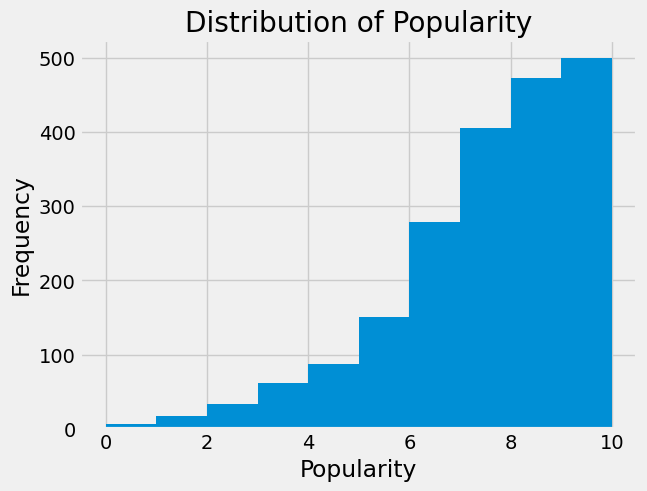

In [6]:
pop=pd.DataFrame(moviedata[["popularity"]])

# Plot the distribution of popularity over 0-10
plt.hist(moviedata['popularity'], bins=10, range=(0,10))
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.title('Distribution of Popularity')
plt.show()


<Axes: >

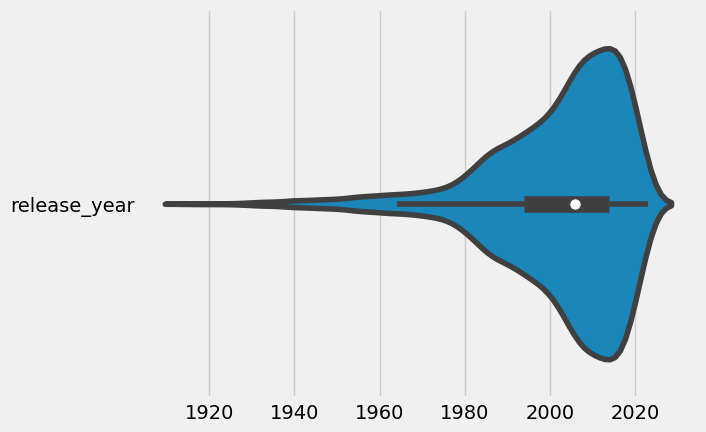

In [7]:
pop=pd.DataFrame(moviedata[["release_year"]])
sb.violinplot(data=pop,orient="h")

From the data, it is more likely that the movie dataset has more records of more recent movies. It is likely that the records of older movies have not been been preserved.

Here is the distribution of vote_average

In [8]:
onlynumericalmoviedata["vote_average"].describe()

count    7486.000000
mean        6.583695
std         0.787086
min         1.900000
25%         6.086250
50%         6.602000
75%         7.143750
max         9.200000
Name: vote_average, dtype: float64

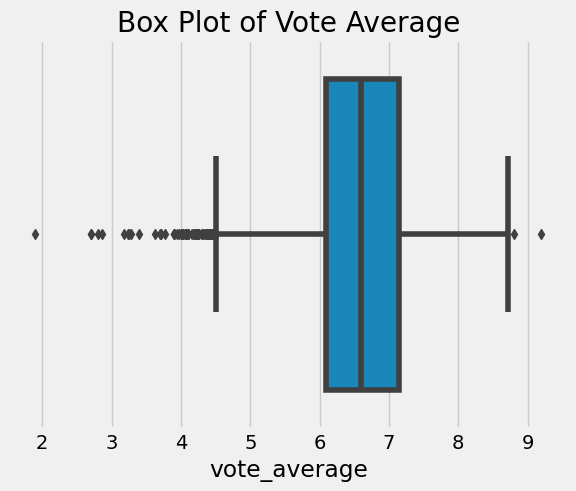

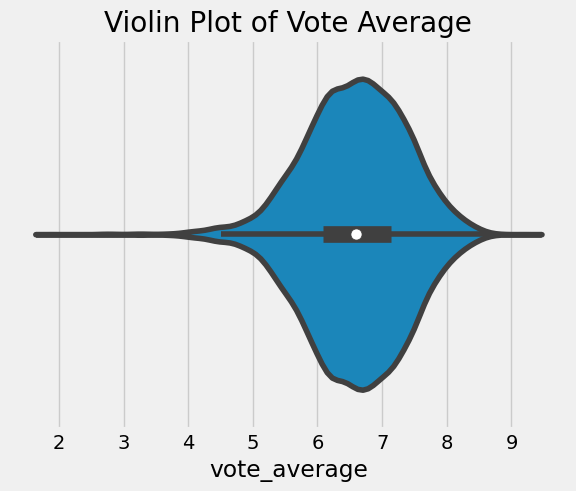

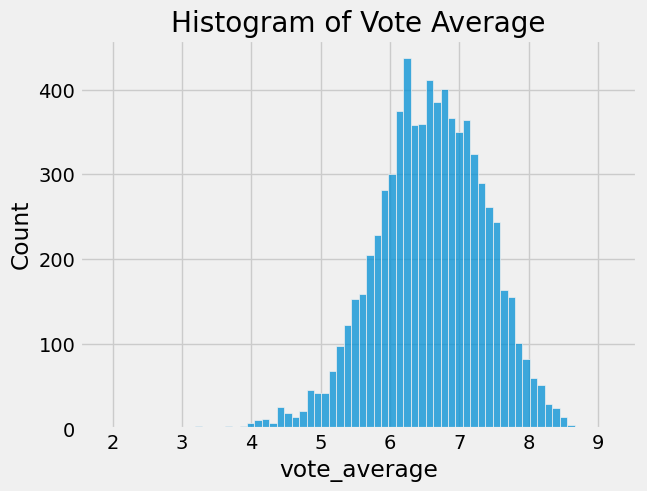

In [9]:
# Create a box plot of vote_average
sb.boxplot(x='vote_average', data=onlynumericalmoviedata)
plt.title('Box Plot of Vote Average')
plt.show()

# Create a violin plot of vote_average
sb.violinplot(x='vote_average', data=onlynumericalmoviedata)
plt.title('Violin Plot of Vote Average')
plt.show()

# Create a histogram of vote_average
sb.histplot(x='vote_average', data=onlynumericalmoviedata)
plt.title('Histogram of Vote Average')
plt.show()


Vote average's distribution is the most centred when comparing all the numerical data. We can indicate if a movie is "good" if the vote average of the movie is equal or above 7.261 as 7.261 is its 80th percentile value.


Now, we will be examining the correrelation between our movie data;

In [10]:
onlynumericalmoviedata.corr()

,popularity,vote_count,vote_average,release_year
popularity,1.000000,0.126305,0.077457,0.084144
vote_count,0.126305,1.000000,0.324263,0.144217
vote_average,0.077457,0.324263,1.000000,-0.068514
release_year,0.084144,0.144217,-0.068514,1.000000


<Axes: >

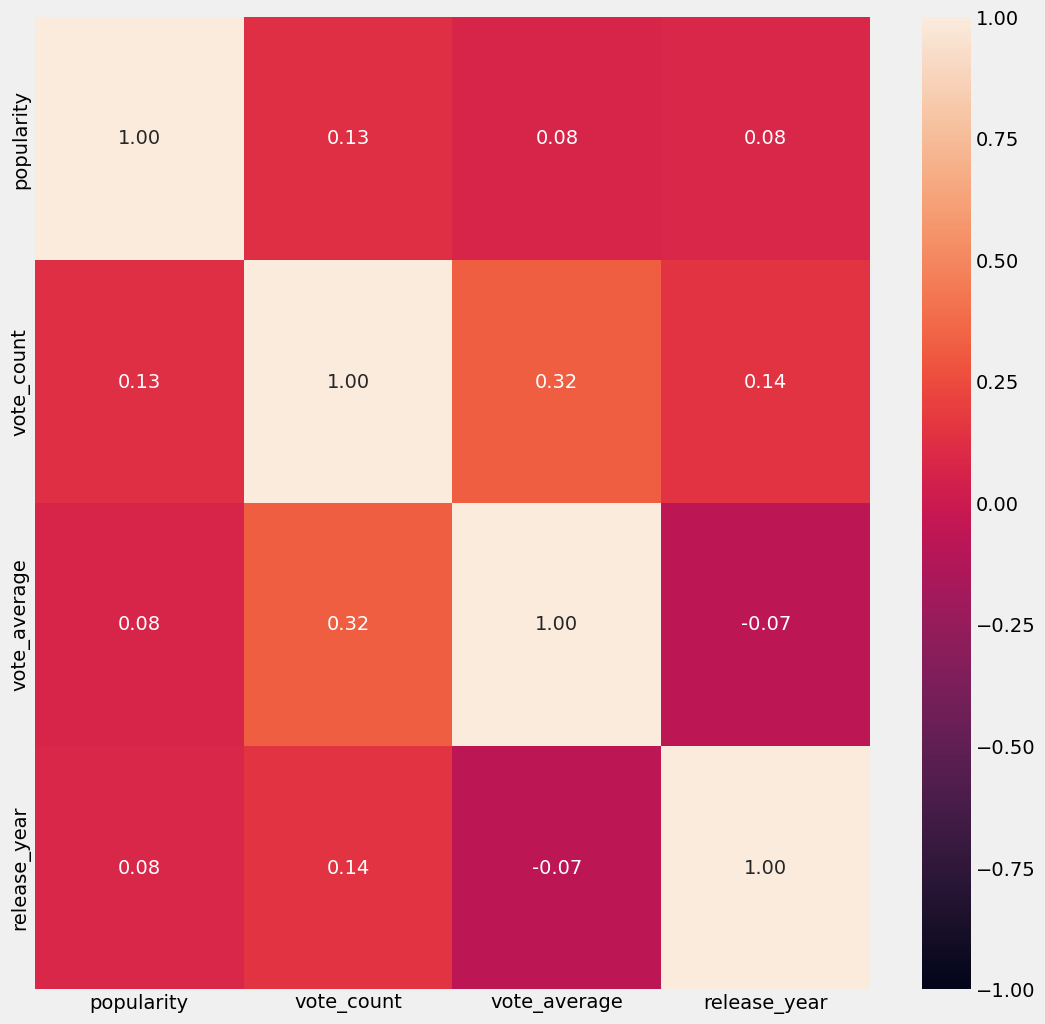

In [11]:
# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(12,12))
sb.heatmap(onlynumericalmoviedata.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")


Seeing from the heatmap, the correlation between vote average and all the other numerical data have a low correlation, with all of their correlation being below 0.4, with vote_count having the highest at 0.32. This shows that all the variables have a low linear correlation against vote_average. So, they have a poor linear relationship. However, this may mean that they may be non-linear relationship. So, we shall also explore non-linear models.

So, let us look at their various scatterplots,


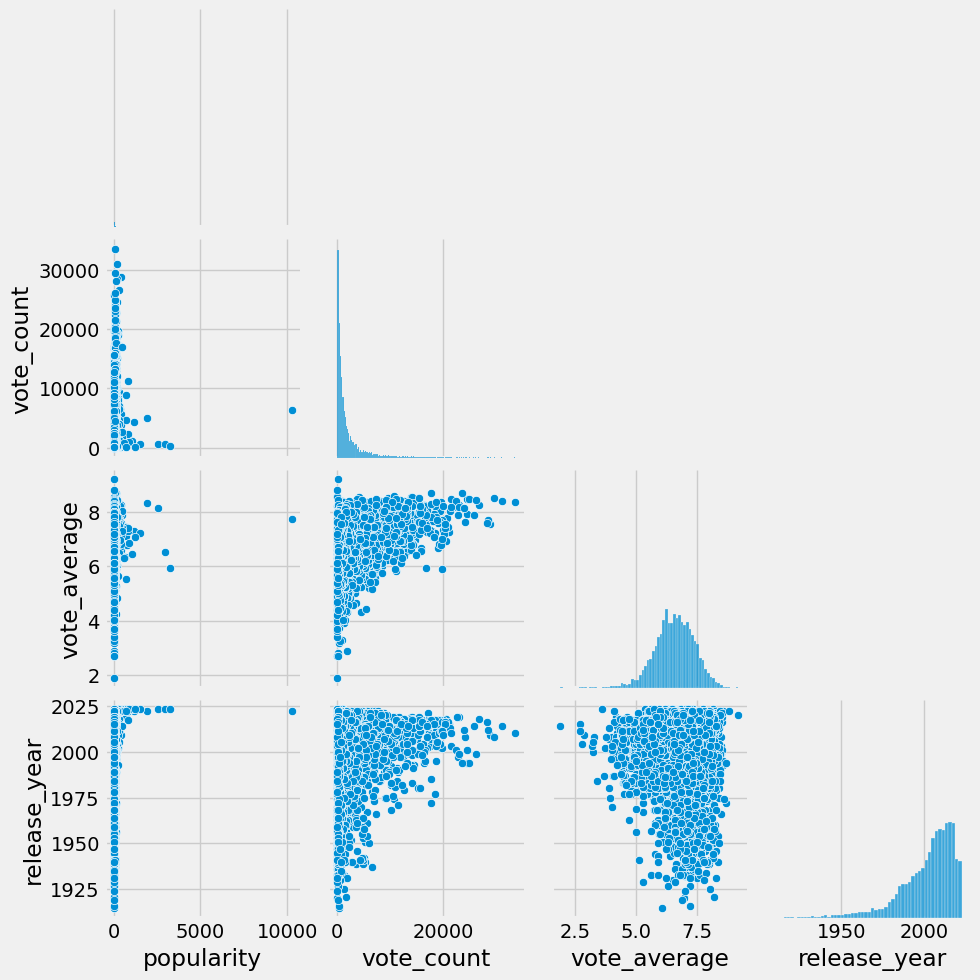

In [12]:
sb.pairplot(data = onlynumericalmoviedata, corner = True)

# Categorical data

Then, let us look at some categorical data

In [13]:
categoricalmoviedata = moviedata[["original_language","genre","release_year","vote_average"]]
categoricalmoviedata

,original_language,genre,release_year,vote_average
1,en,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",2009,7.569
2,en,"['Adventure', 'Science Fiction', 'Action']",2019,8.267
4,en,"['Science Fiction', 'Adventure', 'Action']",2022,7.740
5,en,"['Drama', 'Romance']",1997,7.892
6,en,"['Adventure', 'Action', 'Science Fiction', 'Fa...",2015,7.302
...,...,...,...,...
9946,en,"['Drama', 'Romance']",1931,7.200
9949,en,"['Horror', 'Thriller']",1989,5.400
9951,fr,['Comedy'],2016,5.587
9981,nl,['Comedy'],2015,5.900


Categorical variables chosen here would be year released, genre and original language. Decade released would be used as the categorical variable for year released as using year released as a numerical data would be rather odd, since the median or average year released does not make sense. However, it would make more sense to think of year released as if they were genres, as 80s movies vs 00s movies have a certain style to them that is unique to them, that is why decade released is a categorical data. 

Original language is chosen to represent where the movie may be from as people from English speaking countries would probably also watch English speaking movies even if it was not produced in their own country, so it would be hard to specify exactly which English speaking country the film is from.

Genre will help narrow down the serach for which movie to recommend since people tend to prefer movies from the same genre when looking for movie-baed recommendations.

In [14]:
categoricalmoviedata["release_year"].value_counts()


release_year
2016    285
2013    266
2017    266
2014    260
2018    258
       ... 
1916      1
1925      1
1934      1
1920      1
1924      1
Name: count, Length: 103, dtype: int64

In [15]:
# Extract the year of release from the release_date column
moviedata['year'] = pd.DatetimeIndex(moviedata['release_date']).year

# Get a list of all the years in the dataset
years = list(moviedata['year'].unique())

# Separate the years into their corresponding decades
def separate_years_by_decade(years):
    decades = {}
    for year in years:
        decade = year // 10 * 10
        if decade in decades:
            decades[decade].append(year)
        else:
            decades[decade] = [year]
    return decades

decades = separate_years_by_decade(years)

# Count the number of movies released in each decade
for decade, year_list in decades.items():
    movie_count = len(moviedata[moviedata['year'].isin(year_list)])
    print(f"{decade}s: {movie_count} movies released")


2000s: 1987 movies released
2010s: 2528 movies released
2020s: 425 movies released
1990s: 1170 movies released
1980s: 748 movies released
1970s: 250 movies released
1950s: 108 movies released
1930s: 35 movies released
1960s: 157 movies released
1940s: 67 movies released
1910s: 3 movies released
1920s: 8 movies released


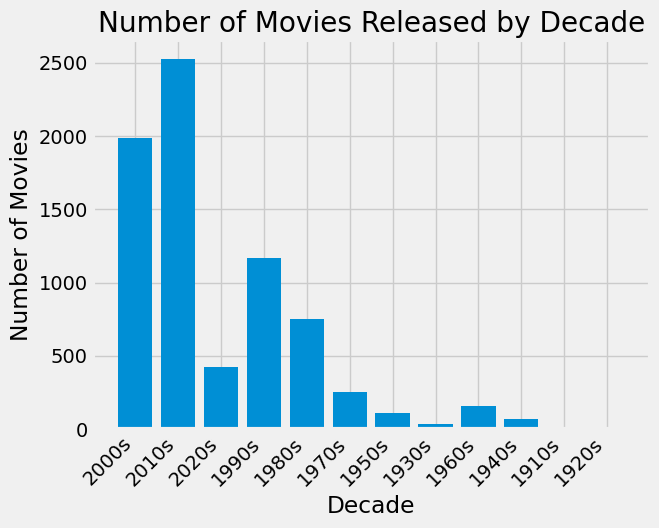

In [16]:
# Count the number of movies released in each decade
decade_counts = []
for decade, year_list in decades.items():
    movie_count = len(moviedata[moviedata['year'].isin(year_list)])
    decade_counts.append(movie_count)
    
# Create a bar chart of the number of movies released in each decade
plt.bar([str(decade) + 's' for decade in decades.keys()], decade_counts)
plt.title('Number of Movies Released by Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Movies')

# Increase spacing between axis labels
plt.xticks(rotation=45, ha='right')

plt.show()

In [17]:
categoricalmoviedata["original_language"].value_counts()


original_language
en    6115
ja     251
fr     249
hi     137
es     112
ko     110
it      89
zh      77
de      72
ru      59
cn      51
ta      24
tr      16
sv      15
da      13
no      12
te      11
pt      10
th      10
ml       9
ar       8
pl       8
nl       3
cs       3
fi       3
id       2
uk       2
fa       2
tl       2
kn       2
he       1
el       1
vi       1
nb       1
is       1
la       1
ro       1
hu       1
ga       1
Name: count, dtype: int64

There are many different languages found in this dataset, so we will only be looking at languages which were used by at least 30 movies so that it would be at least follow a normal distribution via central limit theorem.

In [18]:
morelanguage = categoricalmoviedata[categoricalmoviedata["original_language"].isin(["en","hi","fr","ru","es","ta","ml","ja","ko","zh","it","te","de"])]


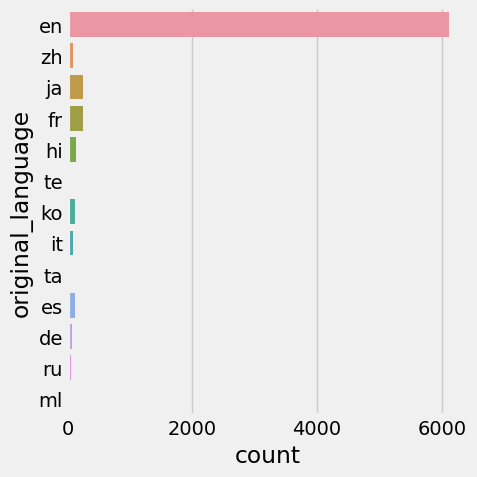

In [19]:
sb.catplot(y = "original_language", data = morelanguage, kind = "count")


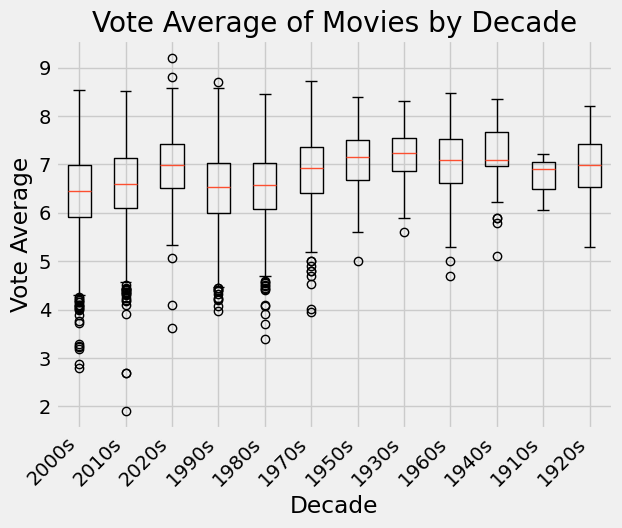

In [20]:
#Let us see these categorical variables against vote average,

# Create a list of the average vote for movies in each decade
decade_vote_averages = []
for decade, year_list in decades.items():
    vote_average = moviedata[moviedata['year'].isin(year_list)]['vote_average'].mean()
    decade_vote_averages.append(vote_average)

# Create a box plot of the vote averages by decade
plt.boxplot([moviedata[moviedata['year'].isin(decades[decade])]['vote_average'] for decade in decades])

# Add labels and title
plt.xticks(range(1, len(decades)+1), [str(decade) + 's' for decade in decades.keys()], rotation=45, ha='right')
plt.xlabel('Decade')
plt.ylabel('Vote Average')
plt.title('Vote Average of Movies by Decade')

plt.show()

Looking at these graphs, it would seem that older movies such as movies from 1930s, 1950s, and 1960s and more recent movies from the 2020s seem to have a highter vote average.

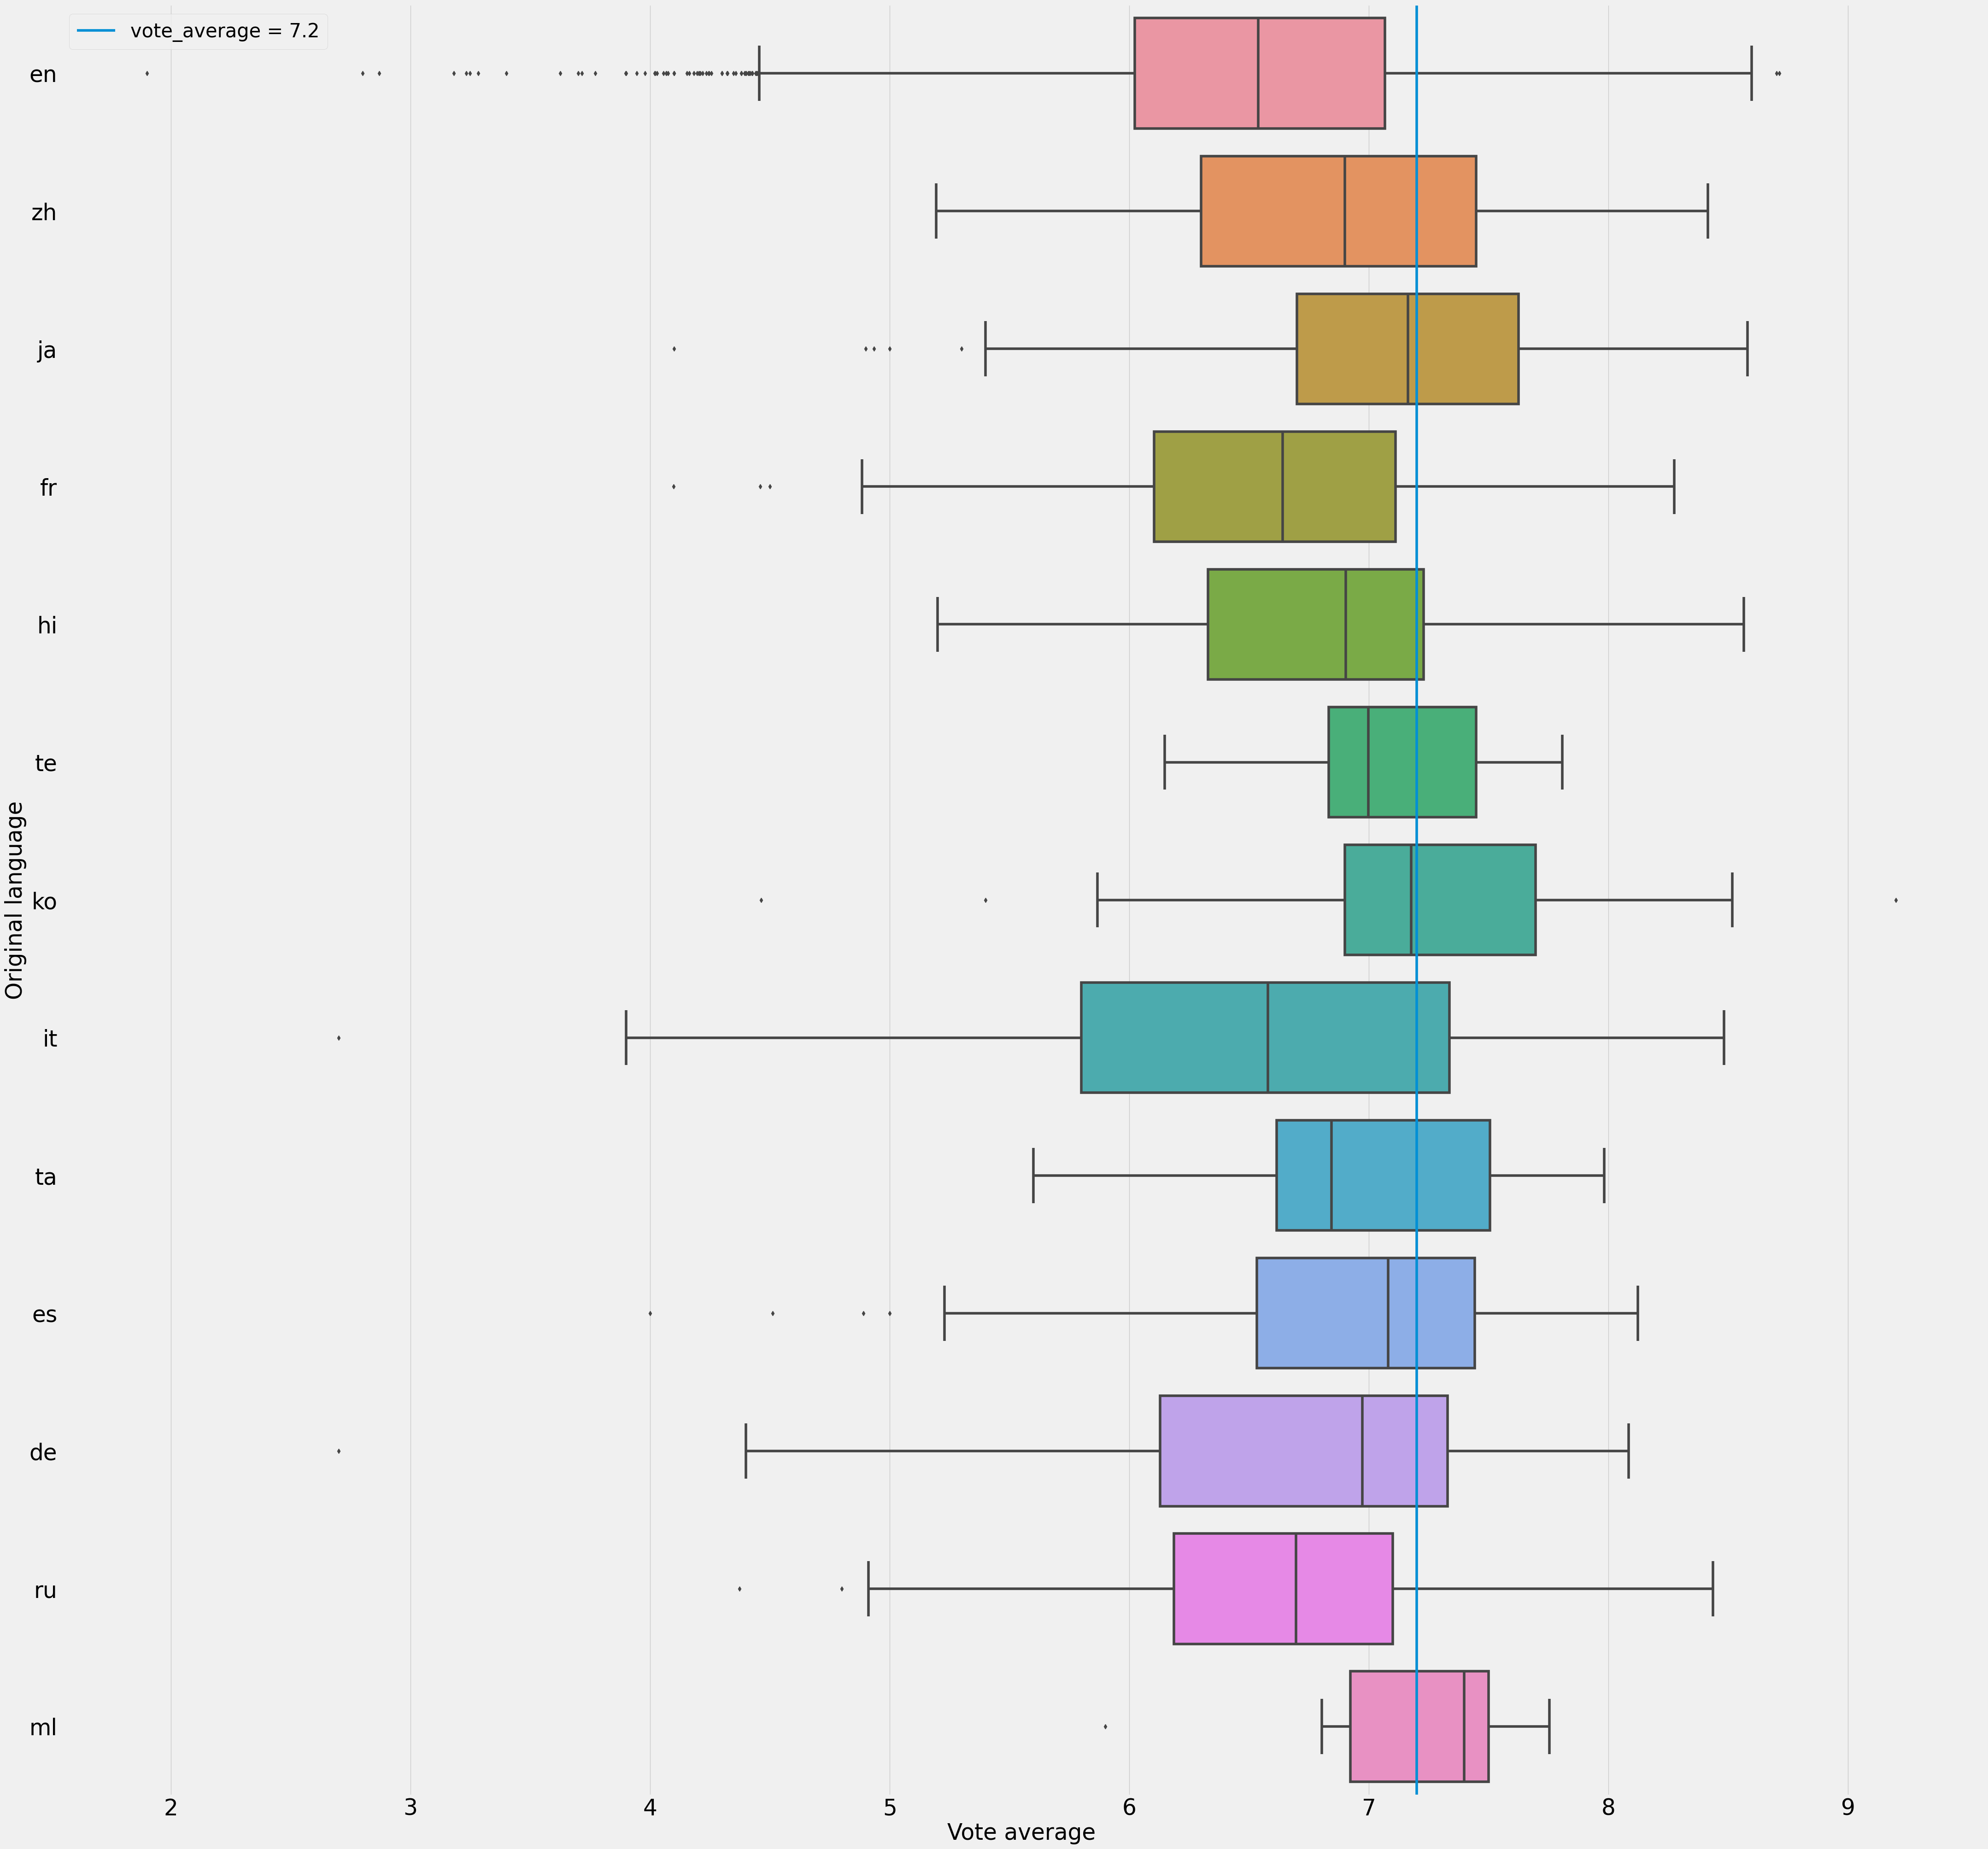

In [21]:
f, ax= plt.subplots(figsize=(48, 48))
sb.boxplot(x = "vote_average", y = "original_language", data = morelanguage, orient = "h", width = 0.8)
ax.tick_params(axis='y', labelsize=35)
ax.tick_params(axis='x', labelsize=35)
ax.set_xlabel("Vote average",fontsize=35)
ax.set_ylabel("Original language",fontsize=35)
plt.axvline(7.2, label= "vote_average = 7.2")
plt.legend(fontsize=30)
plt.show()

In [22]:
API_KEY = '7884759e98354ed855458b12c5c2bcdc'


The genres that we have information about are:

In [23]:
genrelists = r.get(f"https://api.themoviedb.org/3/genre/movie/list?api_key={API_KEY}&language=en-US")
genrelist = genrelists.json()['genres']
ids = {}
for i in genrelist:
    ids[i['name']] = 0
print("List of genres: ", list(ids.keys()))

List of genres:  ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']


In [24]:
from ast import literal_eval
for eachmovie in categoricalmoviedata["genre"]:
    try:
        eachmovie = literal_eval(eachmovie)
    except:
        continue
    for index in range(len(eachmovie)):
        ids[eachmovie[index]] += 1

As some movies have multiple genres attached to it, the following graph is merely counting whenever a movie has a specific genre, so it counts the frequency of each individual genre.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Adventure'),
  Text(2, 0, 'Animation'),
  Text(3, 0, 'Comedy'),
  Text(4, 0, 'Crime'),
  Text(5, 0, 'Documentary'),
  Text(6, 0, 'Drama'),
  Text(7, 0, 'Family'),
  Text(8, 0, 'Fantasy'),
  Text(9, 0, 'History'),
  Text(10, 0, 'Horror'),
  Text(11, 0, 'Music'),
  Text(12, 0, 'Mystery'),
  Text(13, 0, 'Romance'),
  Text(14, 0, 'Science Fiction'),
  Text(15, 0, 'TV Movie'),
  Text(16, 0, 'Thriller'),
  Text(17, 0, 'War'),
  Text(18, 0, 'Western')])

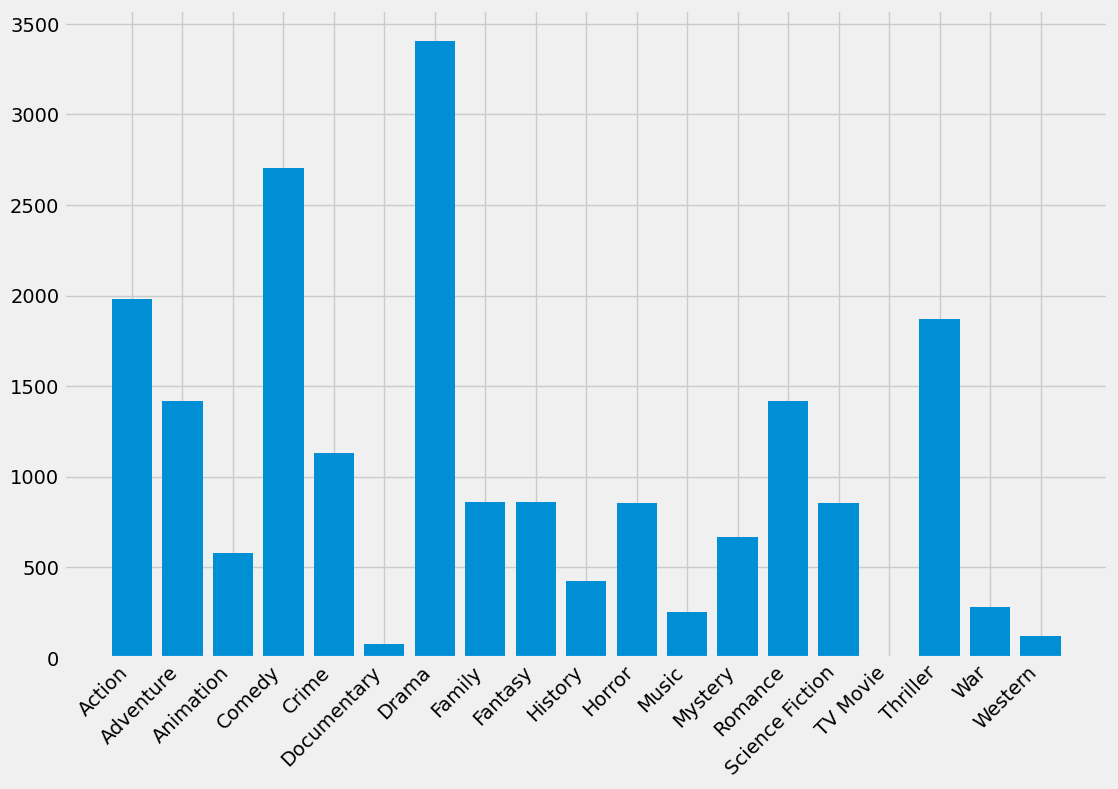

In [25]:
f,ax = plt.subplots(figsize=(12,8))
plt.bar(ids.keys(),ids.values())
plt.xticks(rotation = 45, ha = 'right')

So, the most frequent genres are Drama, Comedy and Action.

Now, let us find the most popluar movies among all the genres

In [26]:
sorted_movies = moviedata.sort_values(by='popularity', ascending=False)

# Select the top 30 movies
top_30_movies = sorted_movies.head(30)

# Print the top 30 movies
print(top_30_movies['title'])


4                                Avatar: The Way of Water
8562                     Winnie the Pooh: Blood and Honey
2101                                         Cocaine Bear
1158                                 John Wick: Chapter 4
275                          Puss in Boots: The Last Wish
683                                             Creed III
3612                                              Mummies
87                         Black Panther: Wakanda Forever
2794                                   Knock at the Cabin
2823                                                Plane
1040                                 John Wick: Chapter 2
1066                                                M3GAN
1766                             Shazam! Fury of the Gods
477                     John Wick: Chapter 3 - Parabellum
351                                            Black Adam
9579                                         13 Exorcisms
276                     Ant-Man and the Wasp: Quantumania
7942          

In [27]:
most_popular_movie = sorted_movies.iloc[0]

# Get the genre(s) for the most popular movie
genres = most_popular_movie['genre'].split(',')

# Print the genres
print("The most popular movie's genre(s) is/are: ")
for genre in genres:
    print(genre.strip())  # Remove any leading/trailing white space


The most popular movie's genre(s) is/are: 
['Science Fiction'
'Adventure'
'Action']


Therefore, the most frequent genres and the most popular genres are not the same. However, the Action genre is common to both the categories. 

In [28]:
firstgenre = []
for eachmovie in categoricalmoviedata["genre"]:
    try:
        eachmovie = literal_eval(eachmovie)
        firstgenre.append(eachmovie[0])
    except:
        firstgenre.append(np.nan)
withfirstgenre = categoricalmoviedata.copy()
withfirstgenre["first_genre"] = firstgenre

In [29]:
withfirstgenre

,original_language,genre,release_year,vote_average,first_genre
1,en,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",2009,7.569,Action
2,en,"['Adventure', 'Science Fiction', 'Action']",2019,8.267,Adventure
4,en,"['Science Fiction', 'Adventure', 'Action']",2022,7.740,Science Fiction
5,en,"['Drama', 'Romance']",1997,7.892,Drama
6,en,"['Adventure', 'Action', 'Science Fiction', 'Fa...",2015,7.302,Adventure
...,...,...,...,...,...
9946,en,"['Drama', 'Romance']",1931,7.200,Drama
9949,en,"['Horror', 'Thriller']",1989,5.400,Horror
9951,fr,['Comedy'],2016,5.587,Comedy
9981,nl,['Comedy'],2015,5.900,Comedy


Since multiple genres are attached to one movie, it is quite difficult to see the relationship between genre and vote average. So, in an attempt to see if there is a correlation between these two, the first genre in the list of genres was taken to compare. Since the genres do not seem to be arranged in the alphabetical order or by the id order, the genres may be arranged with the first listed genre as the most relevant genre associated to the movie.

In [30]:
withfirstgenre["first_genre"].value_counts()


first_genre
Drama              1635
Comedy             1569
Action             1178
Horror              515
Adventure           495
Crime               325
Animation           318
Thriller            315
Romance             211
Fantasy             198
Science Fiction     179
Family              177
Mystery              89
War                  66
Music                58
Western              57
Documentary          55
History              45
TV Movie              1
Name: count, dtype: int64

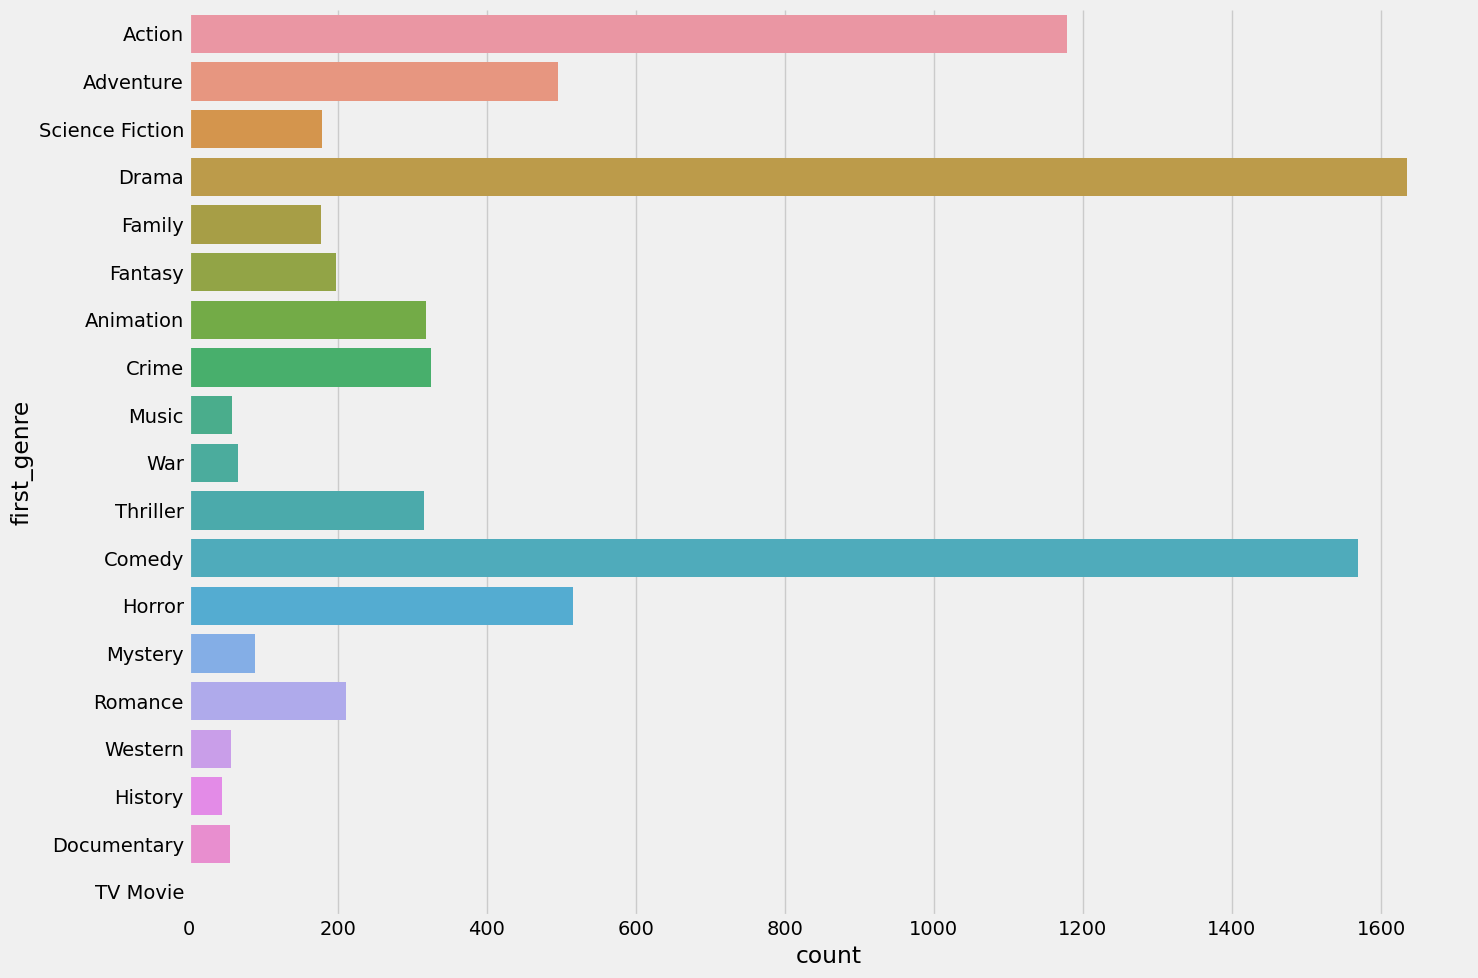

In [31]:
sb.catplot(y = "first_genre", data = withfirstgenre, kind = "count", height= 10, aspect= 1.5)


From the data, we see that the Comedy and Horror genres have one of the lower vote averages, and Drama, Documentary and Western have one of the higher vote averages. However, predicting via the first genre is still quite unreliable as multiple genres are attached to the movie and we are not sure as to how they are arranged.